In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# get the current directory
import os
cwd=os.getcwd()
cwd

'l:\\USGSEsriWCMC_GlobalIslands_v3\\python'

In [2]:
# read ; seperated csv from island_names.csv
df = pd.read_csv('island_nations.csv', sep=';', thousands=',')
# convert Population (total) to numeric
# save as excel file
df.to_excel('island_nations.xlsx')

df.dtypes
list(df.columns.values)

['Name',
 'Location',
 'Number of Islands (approx.)',
 'Island Details',
 'Type of Islands',
 'Surface Area (km&sup2;)',
 'Terrain',
 'Highest Elevation (m)',
 'Highest Elevation (name)',
 'Isolation Index',
 'Climate Risk Index Rank (1993-2012)',
 'Mean Sea Level Trends (mm/year)',
 'Mean Sea Level (meta)',
 'Population (total)',
 'Census Year [Population (total)]',
 'Population Density (p/km²)',
 'Census Year [Population Density (p/km²)]',
 'Population Growth (annual %)',
 'Census Year [Population Growth (annual %)]',
 'GDP (per capita in current US$)',
 'Census Year (GDP)',
 'Dominant Economic Sectors',
 'HDI',
 'Census Year (HDI)',
 'Administration',
 'Miscellaneous',
 'Unnamed: 26']

In [3]:
sublist=[
 'Location',
 'Number of Islands (approx.)',
 'Surface Area (km&sup2;)',
 'Highest Elevation (m)',
 'Isolation Index',
 'Climate Risk Index Rank (1993-2012)',
 'Mean Sea Level Trends (mm/year)',
 'Population (total)',
 'Population Density (p/km²)',
 'Population Growth (annual %)',
 'GDP (per capita in current US$)',
 'HDI',]

In [4]:
sids_list = [
    'American Samoa', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
    'Cape Verde', 'Comoros', 'Cook Islands', 'Dominica', 'Fiji', 'Grenada',
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Jamaica', 'Kiribati', 'Maldives',
    'Marshall Islands', 'Mauritius', 'Federated State of Micronesia', 'Nauru',
    'Niue', 'Palau', 'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé und Príncipe', 'Seychelles',
    'Solomon Islands', 'Suriname', 'Timor-Leste', 'Tonga', 'Trinidad & Tobago',
    'Tuvalu', 'Vanuatu'
]

other_territories_list = [
    'Amrum', 'Anguilla', 'Bahrain', 'Bermuda', 'British Virgin Islands', 'Brunei',
    'Cayman Islands', 'Commonwealth of the Northern Marianas', 'Cuba', 'Curaçao',
    'Dominican Republic', 'Fehmarn', 'Föhr', 'French Polynesia', 'Gröde', 'Guadeloupe',
    'Guam', 'Habel', 'Helgoland', 'Hooge', 'Iceland', 'La Désirade', 'Langeneß',
    'Martinique', 'Montserrat', 'New Caledonia', 'Norderoog', 'Nordstrandischmoor',
    'Oland', 'Pellworm', 'Puerto Rico', 'Réunion', 'Rügen', 'Sarichef Island',
    'Singapore', 'Sint Maarten', 'Süderoog', 'Südfall', 'Sylt', 'Ternate', 'Tiran & Sanafir',
    'Turks and Caicos Islands', 'U.S. Virgin Islands', 'Usedom', 'Venice (centro storico)',
    'Viti Levu'
]



In [5]:
# go through the df add a new column 
# go through the sids_list and other_territories_list
# mark the rows with 'SIDS' or 'Other' in the new column

for sid in sids_list:
    df.loc[df['Name'] == sid, 'Type'] = 'SIDS'
for others in other_territories_list:
    df.loc[df['Name'] == others, 'Type'] = 'Other'
# now print if there are any rows with NaN in the Type column
# fix if location is Carrabean and Name starts with Cur then set type as Other
df.loc[(df['Location'] == 'Caribbean') & (df['Name'].str.startswith('Cura')), 'Type'] = 'Other'
# fix if location is Arctic Ocean and Name starts with Sarichef then set type as Other
df.loc[(df['Location'] == 'Arctic Ocean') & (df['Name'].str.startswith('Sarichef')), 'Type'] = 'Other'
df[df['Type'].isnull()]

C:\Users\apa\AppData\Local\Temp\ipykernel_23540\1485959760.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SIDS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Name'] == sid, 'Type'] = 'SIDS'


,Name,Location,Number of Islands (approx.),Island Details,Type of Islands,Surface Area (km&sup2;),Terrain,Highest Elevation (m),Highest Elevation (name),Isolation Index,...,Census Year [Population Growth (annual %)],GDP (per capita in current US$),Census Year (GDP),Dominant Economic Sectors,HDI,Census Year (HDI),Administration,Miscellaneous,Unnamed: 26,Type


<Axes: xlabel='Location'>

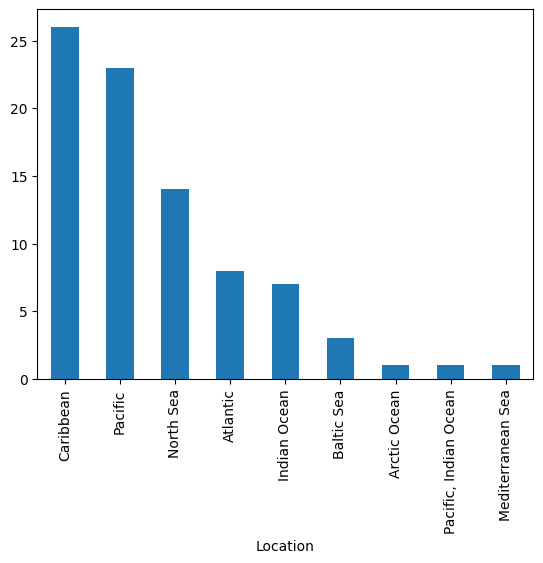

In [6]:
# plot the number of islands in each 'Location'
df['Location'].value_counts().plot(kind='bar')

<Axes: xlabel='Location'>

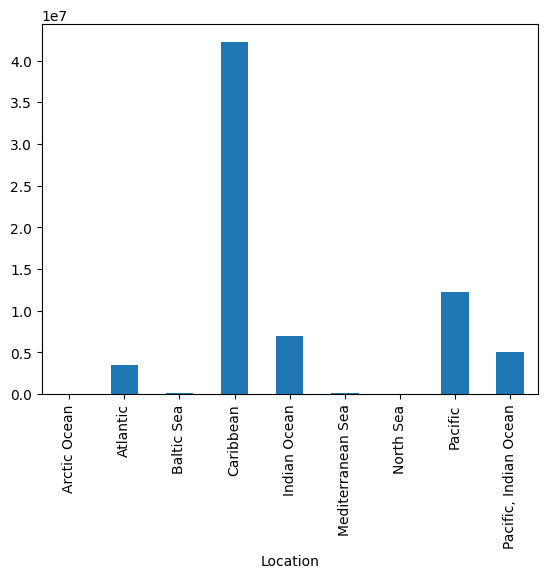

In [7]:
# plot the total population  of islands in each 'Location'
df.groupby('Location')['Population (total)'].sum().plot(kind='bar')

In [8]:
#sns.pairplot(df[sublist], hue="Location")
#sns.set_theme(rc={'figure.figsize':(25,25)})

In [9]:
#for col in sublist:
#    if col=="Location": continue
#    print (f"{col}: {df[col].dtype}, min: {df[col].min()}, max: {df[col].max()}")
#    sns.displot(df, x=col, hue="Location", kind="kde", fill=True)

In [10]:
# for each in collist plot the values for each Name as bar plot
for col in sublist:
    if col=="Location": continue
    print (f"{col}: {df[col].dtype}, min: {df[col].min()}, max: {df[col].max()}")
    sns.set_theme(rc={'figure.figsize':(18,4)})
    # sort the values by the column and plot
#    sns.barplot(x="Name", y=col, data=df.sort_values([col]).reset_index(drop=True))
#    plt.xticks(rotation=90)
#    plt.show()


Number of Islands (approx.): float64, min: 1.0, max: 1225.0
Surface Area (km&sup2;): float64, min: 0.07, max: 462840.0
Highest Elevation (m): float64, min: 1.0, max: 4509.0
Isolation Index: float64, min: -99.0, max: 108.0
Climate Risk Index Rank (1993-2012): float64, min: 3.0, max: 178.0
Mean Sea Level Trends (mm/year): float64, min: -99.0, max: 6.3
Population (total): float64, min: 1.0, max: 11257979.0
Population Density (p/km²): float64, min: 0.0, max: 8531.6
Population Growth (annual %): float64, min: -99.0, max: 7.592
GDP (per capita in current US$): float64, min: -99.0, max: 88207.0
HDI: float64, min: 0.0, max: 0.983


c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


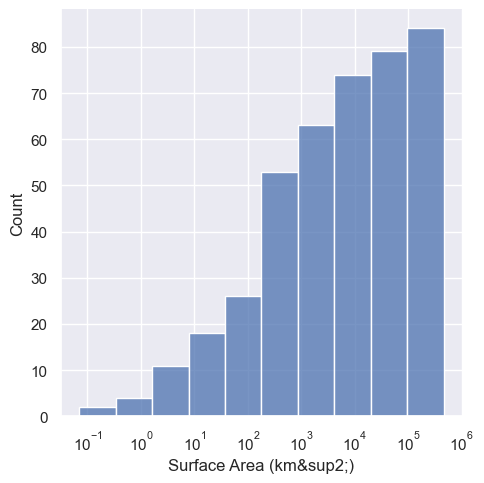

In [11]:
sns.displot(df, x='Surface Area (km&sup2;)',  kind="hist", fill=True, log_scale=True, cumulative=True)

In [12]:
df[ 'Area/Island (km²)']=df['Surface Area (km&sup2;)']/df['Number of Islands (approx.)']
df['Population/Island (-)']=df['Population (total)']/df['Number of Islands (approx.)']


In [13]:
df.columns

Index(['Name', 'Location', 'Number of Islands (approx.)', 'Island Details',
       'Type of Islands', 'Surface Area (km&sup2;)', 'Terrain',
       'Highest Elevation (m)', 'Highest Elevation (name)', 'Isolation Index',
       'Climate Risk Index Rank (1993-2012)',
       'Mean Sea Level Trends (mm/year)', 'Mean Sea Level (meta)',
       'Population (total)', 'Census Year [Population (total)]',
       'Population Density (p/km²)',
       'Census Year [Population Density (p/km²)]',
       'Population Growth (annual %)',
       'Census Year [Population Growth (annual %)]',
       'GDP (per capita in current US$)', 'Census Year (GDP)',
       'Dominant Economic Sectors', 'HDI', 'Census Year (HDI)',
       'Administration', 'Miscellaneous', 'Unnamed: 26', 'Type',
       'Area/Island (km²)', 'Population/Island (-)'],
      dtype='object')

In [14]:
df.columns

Index(['Name', 'Location', 'Number of Islands (approx.)', 'Island Details',
       'Type of Islands', 'Surface Area (km&sup2;)', 'Terrain',
       'Highest Elevation (m)', 'Highest Elevation (name)', 'Isolation Index',
       'Climate Risk Index Rank (1993-2012)',
       'Mean Sea Level Trends (mm/year)', 'Mean Sea Level (meta)',
       'Population (total)', 'Census Year [Population (total)]',
       'Population Density (p/km²)',
       'Census Year [Population Density (p/km²)]',
       'Population Growth (annual %)',
       'Census Year [Population Growth (annual %)]',
       'GDP (per capita in current US$)', 'Census Year (GDP)',
       'Dominant Economic Sectors', 'HDI', 'Census Year (HDI)',
       'Administration', 'Miscellaneous', 'Unnamed: 26', 'Type',
       'Area/Island (km²)', 'Population/Island (-)'],
      dtype='object')

In [15]:
df['Administration'].unique()

array(['dependent (territory of the US)',
       'dependent (autonomous parliamentary democracy, but part of the Kingdom of the Netherlands)',
       'dependent (territory of the UK)',
       'independent (constitutional monarchy with a parliamentary system of government and a Commonwealth realm)',
       'independent (constitutional parliamentary democracy and a Commonwealth realm)',
       'independent (constitutional monarchy)',
       'independent (parliamentary democracy and a Commonwealth realm)',
       'dependent (overseas territory of the UK)',
       'dependent (overseas territory of the UK; internal self-governing)',
       'independent (constitutional sultanate (locally known as Malay Islamic Monarchy))',
       'independent (republic)',
       'dependent (commonwealth; self-governing with locally elected governor, lieutenant governor, and legislature)',
       'independent  (socialist state)',
       'independent (member of the Commonwealth of Nations - parliamentary democ

In [16]:
print(sids_list)
print(other_territories_list )
df.columns

['American Samoa', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Cape Verde', 'Comoros', 'Cook Islands', 'Dominica', 'Fiji', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Jamaica', 'Kiribati', 'Maldives', 'Marshall Islands', 'Mauritius', 'Federated State of Micronesia', 'Nauru', 'Niue', 'Palau', 'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé und Príncipe', 'Seychelles', 'Solomon Islands', 'Suriname', 'Timor-Leste', 'Tonga', 'Trinidad & Tobago', 'Tuvalu', 'Vanuatu']
['Amrum', 'Anguilla', 'Bahrain', 'Bermuda', 'British Virgin Islands', 'Brunei', 'Cayman Islands', 'Commonwealth of the Northern Marianas', 'Cuba', 'Curaçao', 'Dominican Republic', 'Fehmarn', 'Föhr', 'French Polynesia', 'Gröde', 'Guadeloupe', 'Guam', 'Habel', 'Helgoland', 'Hooge', 'Iceland', 'La Désirade', 'Langeneß', 'Martinique', 'Montserrat', 'New Caledonia', 'Norderoog', 'Nordstrandischmoor', 'Oland', 'Pellworm', 'Puerto Rico', 'Réun

Index(['Name', 'Location', 'Number of Islands (approx.)', 'Island Details',
       'Type of Islands', 'Surface Area (km&sup2;)', 'Terrain',
       'Highest Elevation (m)', 'Highest Elevation (name)', 'Isolation Index',
       'Climate Risk Index Rank (1993-2012)',
       'Mean Sea Level Trends (mm/year)', 'Mean Sea Level (meta)',
       'Population (total)', 'Census Year [Population (total)]',
       'Population Density (p/km²)',
       'Census Year [Population Density (p/km²)]',
       'Population Growth (annual %)',
       'Census Year [Population Growth (annual %)]',
       'GDP (per capita in current US$)', 'Census Year (GDP)',
       'Dominant Economic Sectors', 'HDI', 'Census Year (HDI)',
       'Administration', 'Miscellaneous', 'Unnamed: 26', 'Type',
       'Area/Island (km²)', 'Population/Island (-)'],
      dtype='object')

Bahamas (700) 489.82428571428574 19.82857142857143
Bermuda (138) 471.9130434782609 0.36231884057971014
Federated State of Micronesia (607) 182.97199341021417 1.1532125205930808
Fiji (332) 2592.237951807229 55.03012048192771
French Polynesia (118) 2294.6101694915255 33.898305084745765
Maldives (1190) 265.4495798319328 0.25210084033613445
Marshall Islands (1225) 44.11265306122449 0.1469387755102041
Palau (356) 57.50561797752809 1.2921348314606742
Papua New Guinea (1000) 6858.266 462.84
Seychelles (116) 745.9051724137931 3.9655172413793105
Solomon Islands (998) 539.2264529058116 28.95791583166333
Tonga (169) 615.7278106508876 4.437869822485207
Venice (centro storico) (118) 510.4491525423729 0.059830508474576265


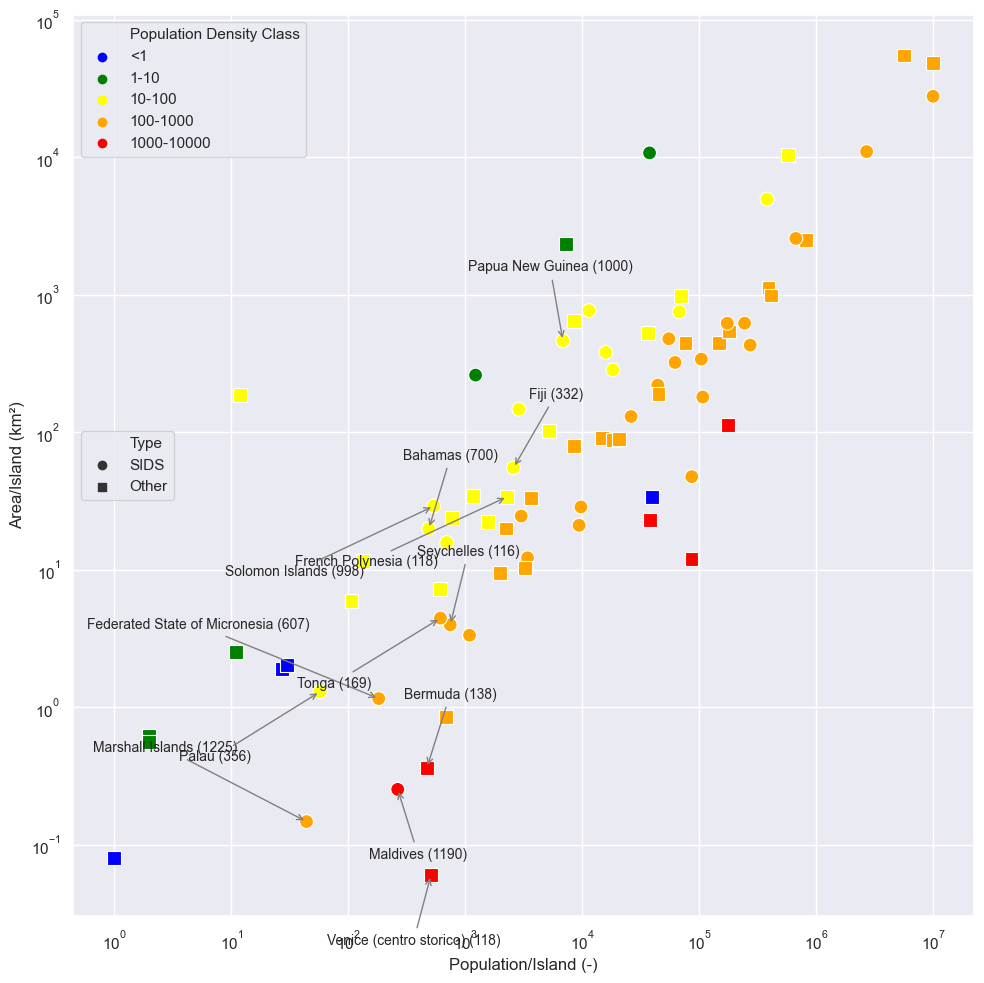

In [17]:
# Create a new column for population density classes
df['Population Density Class'] = pd.cut(
    df['Population Density (p/km²)'],
    bins=[-1, 1, 10, 100, 1000, 10000],
    labels=['<1', '1-10', '10-100', '100-1000', '1000-10000']
)
df [ 'NameX']=df['Name']+' ('+df['Number of Islands (approx.)'].apply(lambda x: f'{x:.0f}')+')'

# Set up the color palette for population density classes
palette = {
    '<1': 'blue',
    '1-10': 'green',
    '10-100': 'yellow',
    '100-1000': 'orange',
    '1000-10000': 'red'
}

# Set up the marker style for each type
markers = {
    'SIDS': 'o',    # Circle marker
    'Other': 's'    # Square marker
}

# Create the plot using seaborn
plt.figure(figsize=(10, 10))
scatter=sns.scatterplot(
    data=df,
    y='Area/Island (km²)',
    x='Population/Island (-)',
    hue='Population Density Class',
    style='Type',
    palette=palette,
    markers=markers,
    s=100,  # Marker size
    edgecolor='white'  # Black edges for markers
)

# Adding labels and title
#plt.ylabel('Area/Island (sq. km)')
#plt.xlabel('Population/Island')
#plt.title('Population vs Area/Island with Density Classes and Types')

# Create the first legend for population density (hue)
pop_density_legend = scatter.legend_  # Extract the default legend
handles, labels = scatter.get_legend_handles_labels()
legend1 = plt.legend(handles[:6], labels[:6],   loc='upper left')

# Create the second legend for type (style)
legend2 = plt.legend(handles[6:], labels[6:],  loc='center left')

# Add the first legend back to the plot
plt.gca().add_artist(legend1)
# log scale for both x and y axis
plt.yscale('log')
plt.xscale('log')
# Display the plot

# Function to check for overlapping labels
def check_overlap(bboxes, new_bbox):
    for bbox in bboxes:
        if bbox.overlaps(new_bbox):
            return True
    return False

# Label islands with 'NameX' for number of islands >= 100, and dynamically adjust to avoid overlaps
bboxes = []  # Store bounding boxes of labels to check overlaps
for i in range(len(df)):
    if df['Number of Islands (approx.)'][i] >= 100:
        # Get the position of the point
        x = df['Population/Island (-)'][i]
        y = df['Area/Island (km²)'][i]
        print(df['NameX'][i], x, y)
        # Try different positions iteratively to avoid overlaps
        placed_label = False  # Flag to indicate if the label has been placed
        j=0
        for offset in [(50, 50), (50, -50), (-50, 50), (-50, -50)]:
            j+=1
            # Create the annotation and check if it overlaps
            annotation = plt.annotate(
                df['NameX'][i],  # Label text
                (x, y),  # Point location
                xytext=offset,  # Offset by 50 pixels in the specified direction
                textcoords='offset points',
                fontsize=10,
                arrowprops=dict(
                    arrowstyle="->",  # Arrow style with arrowhead
                    lw=1,  # Line width of arrow
                    color='gray'
                ),
                horizontalalignment='right'
            )

            # Get the bounding box of the annotation
            renderer = plt.gcf().canvas.get_renderer()
            bbox = annotation.get_window_extent(renderer)

            # Check if this annotation is overlapping with any existing labels
            if not check_overlap(bboxes, bbox):
                bboxes.append(bbox)
                placed_label = True  # Label has been placed
                break  # Exit the loop if no overlap is found
            else:
                # if it is not last iteration, remove the annotation
                if j<4:
                    annotation.remove()

        # If the label was placed successfully, skip further attempts for this point
        if placed_label:
            continue



plt.tight_layout()


plt.savefig('Figure_2.svg')
plt.show()

In [18]:
# list the names with 1000 or more approx. islands
# sort by the number of islands
df[df['Number of Islands (approx.)']>=100].sort_values('Number of Islands (approx.)', ascending=False)['NameX']

42                Marshall Islands (1225)
41                        Maldives (1190)
53                Papua New Guinea (1000)
67                  Solomon Islands (998)
5                           Bahamas (700)
21    Federated State of Micronesia (607)
52                            Palau (356)
23                             Fiji (332)
75                            Tonga (169)
9                           Bermuda (138)
25                 French Polynesia (118)
82          Venice (centro storico) (118)
64                       Seychelles (116)
Name: NameX, dtype: object